In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pydicom

In [2]:
def apply_clahe(image):
    # Convert the image to 8-bit unsigned integer format
    img_uint8 = (image - np.min(image)) / (np.max(image) - np.min(image)) * 255
    img_uint8 = img_uint8.astype(np.uint8)

    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_result = clahe.apply(img_uint8)

    return clahe_result

In [3]:
# Function for Canny edge detection
def apply_canny(image):
    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Apply Canny edge detection
    edges = cv2.Canny(blurred_image, 50, 150)

    return edges

In [4]:
# 1. Load DICOM files
file_path_1 = './1-5.dcm'
file_path_2 = './1-9.dcm'

dicom_image_1 = pydicom.dcmread(file_path_1)
dicom_image_2 = pydicom.dcmread(file_path_2)

file_path_2 = './1-9.dcm'
dicom_image_2 = pydicom.dcmread(file_path_2)

Text(0.5, 1.0, 'DICOM Image 1')

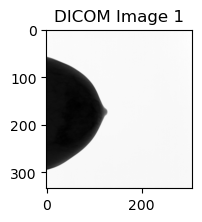

In [5]:
# 1a. Image 1 display
plt.subplot(2, 3, 1)
plt.imshow(dicom_image_1.pixel_array, cmap='gray')
plt.title('DICOM Image 1')

Text(0.5, 1.0, 'CLAHE Enhanced Image 1')

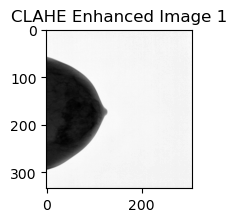

In [6]:
# Apply CLAHE to Image 1
clahe_image_1 = apply_clahe(dicom_image_1.pixel_array)
plt.subplot(2, 3, 2)
plt.imshow(clahe_image_1, cmap='gray')
plt.title('CLAHE Enhanced Image 1')

Text(0.5, 1.0, 'Canny Edge Detection - Image 1')

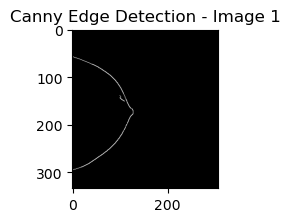

In [7]:
# Apply Canny edge detection to Image 1
canny_image_1 = apply_canny(clahe_image_1)
plt.subplot(2, 3, 3)
plt.imshow(canny_image_1, cmap='gray')
plt.title('Canny Edge Detection - Image 1')


Text(0.5, 1.0, 'Fused Image')

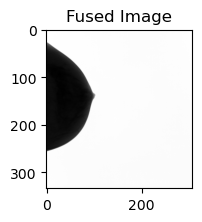

In [8]:
# 2. Fuse the images
fused_image = np.maximum(clahe_image_1, dicom_image_2.pixel_array)

# Display the fused image
plt.subplot(2, 3, 4)
plt.imshow(fused_image, cmap='gray')
plt.title('Fused Image')

In [9]:
import cv2
import matplotlib.pyplot as plt
import pydicom


In [10]:
# Load DICOM file
file_path = './1-5.dcm'
dicom_image = pydicom.dcmread(file_path)

Text(0.5, 1.0, 'Original DICOM Image')

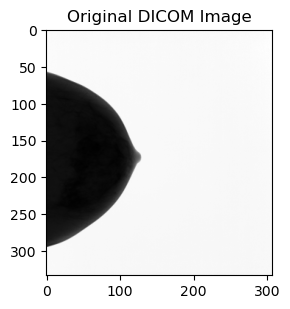

In [11]:
# Display original DICOM image
plt.subplot(1, 2, 1)
plt.imshow(dicom_image.pixel_array, cmap='gray')
plt.title('Original DICOM Image')


In [12]:
# Convert to 8-bit unsigned integer format
img_uint8 = (dicom_image.pixel_array - np.min(dicom_image.pixel_array)) / (np.max(dicom_image.pixel_array) - np.min(dicom_image.pixel_array)) * 255
img_uint8 = img_uint8.astype(np.uint8)

In [13]:
# Apply Histogram Equalization
he_image = cv2.equalizeHist(img_uint8)

Text(0.5, 1.0, 'Histogram Equalized Image')

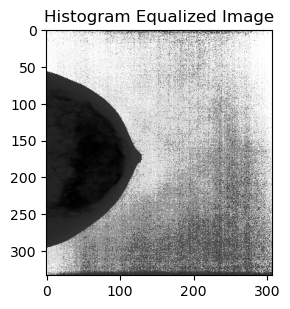

In [14]:
# Display Histogram Equalized Image
plt.subplot(1, 2, 2)
plt.imshow(he_image, cmap='gray')
plt.title('Histogram Equalized Image')

In [15]:
# Apply Adaptive Histogram Equalization (AHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
ahe_image = clahe.apply(dicom_image.pixel_array)

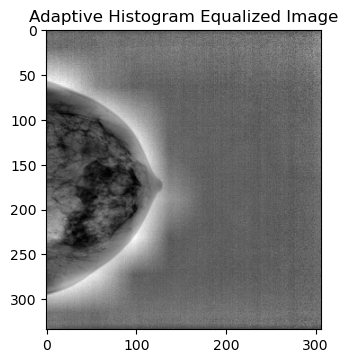

In [16]:
# Display AHE Image
plt.subplot(1, 2, 2)
plt.imshow(ahe_image, cmap='gray')
plt.title('Adaptive Histogram Equalized Image')

plt.tight_layout()
plt.show()

In [17]:
# Apply Gamma Correction
gamma = 1.5
gamma_corrected = np.power(dicom_image.pixel_array / float(np.max(dicom_image.pixel_array)), gamma) * 255.0

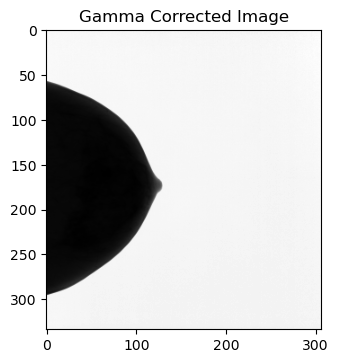

In [18]:
# Display Gamma Corrected Image
plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected, cmap='gray')
plt.title('Gamma Corrected Image')

plt.tight_layout()
plt.show()

In [19]:
# Apply Logarithmic Transformation
log_transformed = np.log1p(dicom_image.pixel_array)

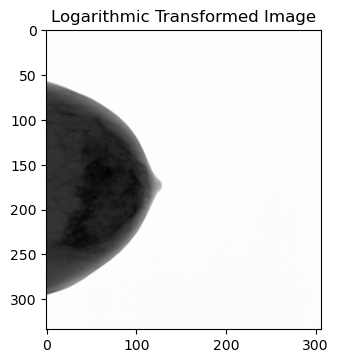

In [20]:
# Display Logarithmic Transformed Image
plt.subplot(1, 2, 2)
plt.imshow(log_transformed, cmap='gray')
plt.title('Logarithmic Transformed Image')

plt.tight_layout()
plt.show()

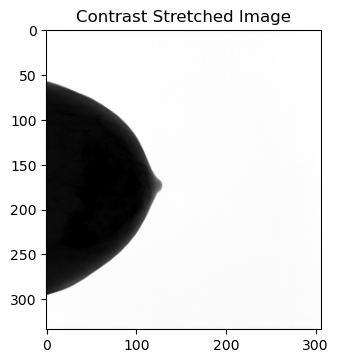

In [21]:
# Apply Contrast Stretching
p_min, p_max = np.percentile(dicom_image.pixel_array, (2, 98))
contrast_stretched = np.clip((dicom_image.pixel_array - p_min) / (p_max - p_min) * 255.0, 0, 255)

# Display Contrast Stretched Image
plt.subplot(1, 2, 2)
plt.imshow(contrast_stretched, cmap='gray')
plt.title('Contrast Stretched Image')

plt.tight_layout()
plt.show()

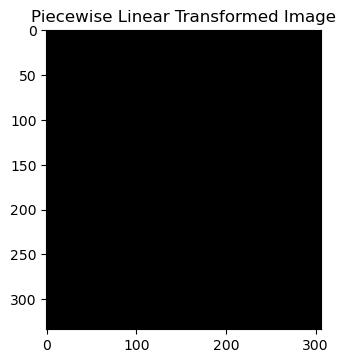

In [22]:
# Apply Piecewise Linear Transformation
alpha = 1.5
beta = 30
piecewise_transformed = np.clip(alpha * dicom_image.pixel_array + beta, 0, 255)

# Display Piecewise Linear Transformed Image
plt.subplot(1, 2, 2)
plt.imshow(piecewise_transformed, cmap='gray')
plt.title('Piecewise Linear Transformed Image')

plt.tight_layout()
plt.show()

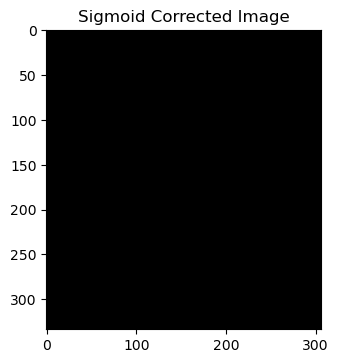

In [23]:
# Apply Sigmoid Correction
alpha = 0.1
beta = 100
sigmoid_corrected = 1 / (1 + np.exp(-alpha * (dicom_image.pixel_array - beta)))

# Scale to 0-255
sigmoid_corrected = (sigmoid_corrected * 255).astype(np.uint8)

# Display Sigmoid Corrected Image
plt.subplot(1, 2, 2)
plt.imshow(sigmoid_corrected, cmap='gray')
plt.title('Sigmoid Corrected Image')

plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_18388\1485870561.py:2: RuntimeWarning: overflow encountered in exp
  exponential_transformed = np.exp(0.1 * dicom_image.pixel_array)
C:\Users\USER\anaconda3\Lib\site-packages\matplotlib\image.py:455: RuntimeWarning: overflow encountered in scalar multiply
  newmin = vmid - dv * fact
C:\Users\USER\anaconda3\Lib\site-packages\matplotlib\image.py:460: RuntimeWarning: overflow encountered in scalar multiply
  newmax = vmid + dv * fact
C:\Users\USER\anaconda3\Lib\site-packages\matplotlib\image.py:491: RuntimeWarning: invalid value encountered in divide
  A_scaled /= ((a_max - a_min) / frac)
C:\Users\USER\anaconda3\Lib\site-packages\matplotlib\image.py:505: RuntimeWarning: invalid value encountered in multiply
  A_resampled *= ((a_max - a_min) / frac)
C:\Users\USER\anaconda3\Lib\site-packages\matplotlib\image.py:506: RuntimeWarning: invalid value encountered in multiply
  vrange *= ((a_max - a_min) / frac)


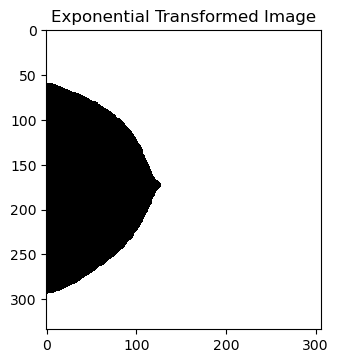

In [24]:
# Apply Exponential Transformation
exponential_transformed = np.exp(0.1 * dicom_image.pixel_array)

# Display Exponential Transformed Image
plt.subplot(1, 2, 2)
plt.imshow(exponential_transformed, cmap='gray')
plt.title('Exponential Transformed Image')

plt.tight_layout()
plt.show()

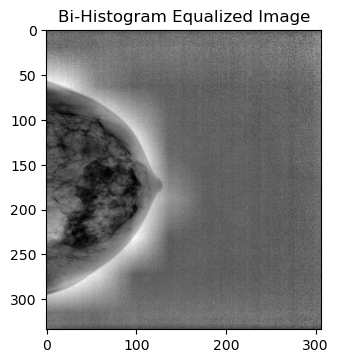

In [25]:
# Apply Bi-Histogram Equalization using createCLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
bi_hist_eq_image = clahe.apply(dicom_image.pixel_array)

# Display Bi-Histogram Equalized Image
plt.subplot(1, 2, 2)
plt.imshow(bi_hist_eq_image, cmap='gray')
plt.title('Bi-Histogram Equalized Image')

plt.tight_layout()
plt.show()

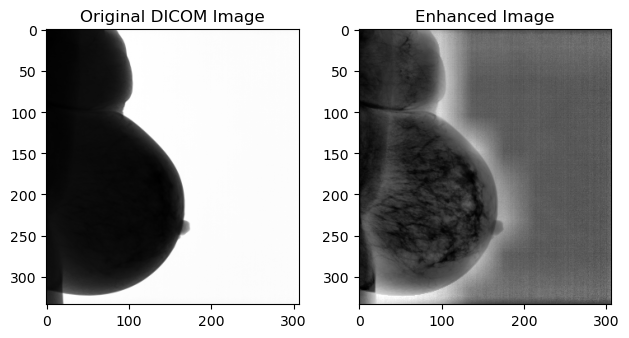

In [26]:
import cv2
import matplotlib.pyplot as plt
import pydicom

# Load DICOM file from your new dataset
file_path = './new.dcm'
dicom_image = pydicom.dcmread(file_path)

# Display original DICOM image
plt.subplot(1, 2, 1)
plt.imshow(dicom_image.pixel_array, cmap='gray')
plt.title('Original DICOM Image')

# Apply Contrast Enhancement (e.g., CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_image = clahe.apply(dicom_image.pixel_array)

# Display Enhanced Image
plt.subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title('Enhanced Image')

plt.tight_layout()
plt.show()

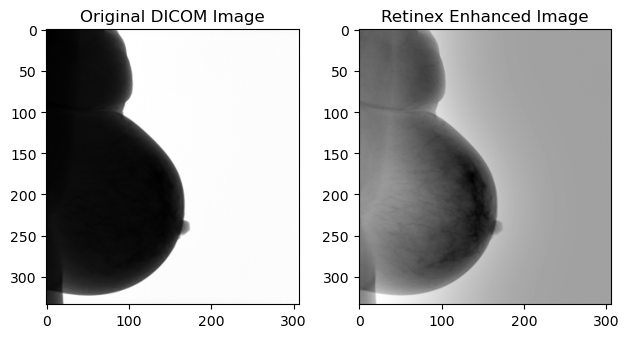

In [27]:
import cv2
import matplotlib.pyplot as plt
import pydicom
import numpy as np

def retinex(image, sigma=50):
    # Apply a Gaussian filter to the image
    blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)
    
    # Calculate the logarithm of the image and the blurred image
    log_image = np.log1p(image.astype(np.float32))
    log_blurred = np.log1p(blurred_image.astype(np.float32))
    
    # Calculate the Retinex response
    retinex_response = log_image - log_blurred
    
    # Rescale the Retinex response to 0-255
    retinex_response = (retinex_response - np.min(retinex_response)) / (np.max(retinex_response) - np.min(retinex_response)) * 255.0
    
    return retinex_response.astype(np.uint8)

# Load DICOM file from your new dataset
file_path = './new.dcm'
dicom_image = pydicom.dcmread(file_path)

# Display original DICOM image
plt.subplot(1, 2, 1)
plt.imshow(dicom_image.pixel_array, cmap='gray')
plt.title('Original DICOM Image')

# Apply Retinex algorithm for contrast enhancement
retinex_image = retinex(dicom_image.pixel_array)

# Display Retinex Enhanced Image
plt.subplot(1, 2, 2)
plt.imshow(retinex_image, cmap='gray')
plt.title('Retinex Enhanced Image')

plt.tight_layout()
plt.show()


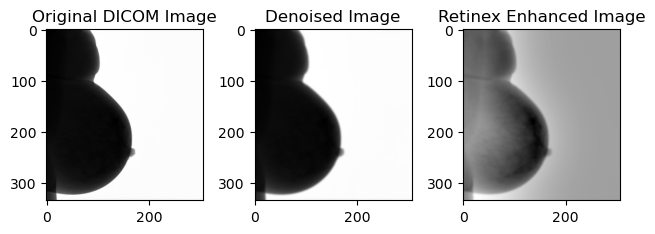

In [28]:
import cv2
import matplotlib.pyplot as plt
import pydicom
import numpy as np

def denoise_gaussian(image, sigma=1.5):
    # Apply Gaussian denoising
    denoised_image = cv2.GaussianBlur(image, (0, 0), sigma)
    return denoised_image

def retinex(image, sigma=50):
    # Apply a Gaussian filter to the image
    blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)
    
    # Calculate the logarithm of the image and the blurred image
    log_image = np.log1p(image.astype(np.float32))
    log_blurred = np.log1p(blurred_image.astype(np.float32))
    
    # Calculate the Retinex response
    retinex_response = log_image - log_blurred
    
    # Rescale the Retinex response to 0-255
    retinex_response = (retinex_response - np.min(retinex_response)) / (np.max(retinex_response) - np.min(retinex_response)) * 255.0
    
    return retinex_response.astype(np.uint8)

# Load DICOM file from your new dataset
file_path = './new.dcm'
dicom_image = pydicom.dcmread(file_path)

# Display original DICOM image
plt.subplot(1, 3, 1)
plt.imshow(dicom_image.pixel_array, cmap='gray')
plt.title('Original DICOM Image')

# Apply Gaussian denoising
denoised_image = denoise_gaussian(dicom_image.pixel_array)

# Display Denoised Image
plt.subplot(1, 3, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')

# Apply Retinex algorithm for contrast enhancement on denoised image
retinex_image = retinex(denoised_image)

# Display Retinex Enhanced Image
plt.subplot(1, 3, 3)
plt.imshow(retinex_image, cmap='gray')
plt.title('Retinex Enhanced Image')

plt.tight_layout()
plt.show()


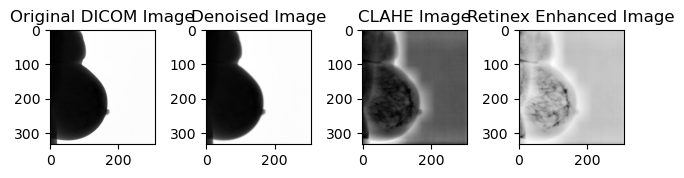

In [29]:
import cv2
import matplotlib.pyplot as plt
import pydicom
import numpy as np

def denoise_gaussian(image, sigma=1.5):
    # Apply Gaussian denoising
    denoised_image = cv2.GaussianBlur(image, (0, 0), sigma)
    return denoised_image

def apply_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    # Create CLAHE object
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    
    # Apply CLAHE
    clahe_image = clahe.apply(image)
    return clahe_image

def retinex(image, sigma=50):
    # Apply a Gaussian filter to the image
    blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)
    
    # Calculate the logarithm of the image and the blurred image
    log_image = np.log1p(image.astype(np.float32))
    log_blurred = np.log1p(blurred_image.astype(np.float32))
    
    # Calculate the Retinex response
    retinex_response = log_image - log_blurred
    
    # Rescale the Retinex response to 0-255
    retinex_response = (retinex_response - np.min(retinex_response)) / (np.max(retinex_response) - np.min(retinex_response)) * 255.0
    
    return retinex_response.astype(np.uint8)

# Load DICOM file from your new dataset
file_path = './new.dcm'
dicom_image = pydicom.dcmread(file_path)

# Display original DICOM image
plt.subplot(1, 4, 1)
plt.imshow(dicom_image.pixel_array, cmap='gray')
plt.title('Original DICOM Image')

# Apply Gaussian denoising
denoised_image = denoise_gaussian(dicom_image.pixel_array)

# Display Denoised Image
plt.subplot(1, 4, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')

# Apply CLAHE
clahe_image = apply_clahe(denoised_image)

# Display CLAHE Image
plt.subplot(1, 4, 3)
plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE Image')

# Apply Retinex algorithm for contrast enhancement on CLAHE image
retinex_image = retinex(clahe_image)

# Display Retinex Enhanced Image
plt.subplot(1, 4, 4)
plt.imshow(retinex_image, cmap='gray')
plt.title('Retinex Enhanced Image')

plt.tight_layout()
plt.show()


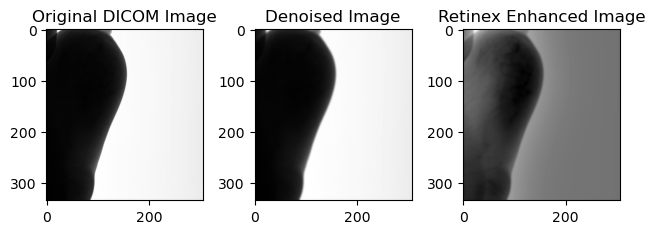

In [30]:
import cv2
import matplotlib.pyplot as plt
import pydicom
import numpy as np

def denoise_gaussian(image, sigma=1.5):
    # Apply Gaussian denoising
    denoised_image = cv2.GaussianBlur(image, (0, 0), sigma)
    return denoised_image

def retinex(image, sigma=50):
    # Apply a Gaussian filter to the image
    blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)
    
    # Calculate the logarithm of the image and the blurred image
    log_image = np.log1p(image.astype(np.float32))
    log_blurred = np.log1p(blurred_image.astype(np.float32))
    
    # Calculate the Retinex response
    retinex_response = log_image - log_blurred
    
    # Rescale the Retinex response to 0-255
    retinex_response = (retinex_response - np.min(retinex_response)) / (np.max(retinex_response) - np.min(retinex_response)) * 255.0
    
    return retinex_response.astype(np.uint8)

# Load DICOM file from your new dataset
file_path = './new1.dcm'
dicom_image = pydicom.dcmread(file_path)

# Display original DICOM image
plt.subplot(1, 3, 1)
plt.imshow(dicom_image.pixel_array, cmap='gray')
plt.title('Original DICOM Image')

# Apply Gaussian denoising
denoised_image = denoise_gaussian(dicom_image.pixel_array)

# Display Denoised Image
plt.subplot(1, 3, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')

# Apply Retinex algorithm for contrast enhancement on denoised image
retinex_image = retinex(denoised_image)

# Display Retinex Enhanced Image
plt.subplot(1, 3, 3)
plt.imshow(retinex_image, cmap='gray')
plt.title('Retinex Enhanced Image')

plt.tight_layout()
plt.show()


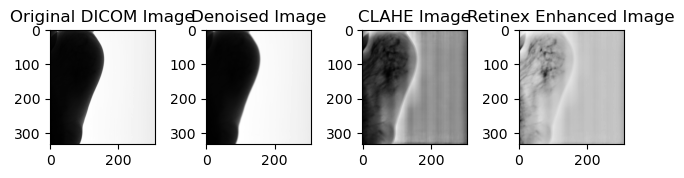

In [31]:
import cv2
import matplotlib.pyplot as plt
import pydicom
import numpy as np

def denoise_gaussian(image, sigma=1.5):
    # Apply Gaussian denoising
    denoised_image = cv2.GaussianBlur(image, (0, 0), sigma)
    return denoised_image

def apply_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    # Create CLAHE object
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    
    # Apply CLAHE
    clahe_image = clahe.apply(image)
    return clahe_image

def retinex(image, sigma=50):
    # Apply a Gaussian filter to the image
    blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)
    
    # Calculate the logarithm of the image and the blurred image
    log_image = np.log1p(image.astype(np.float32))
    log_blurred = np.log1p(blurred_image.astype(np.float32))
    
    # Calculate the Retinex response
    retinex_response = log_image - log_blurred
    
    # Rescale the Retinex response to 0-255
    retinex_response = (retinex_response - np.min(retinex_response)) / (np.max(retinex_response) - np.min(retinex_response)) * 255.0
    
    return retinex_response.astype(np.uint8)

# Load DICOM file from your new dataset
file_path = './new1.dcm'
dicom_image = pydicom.dcmread(file_path)

# Display original DICOM image
plt.subplot(1, 4, 1)
plt.imshow(dicom_image.pixel_array, cmap='gray')
plt.title('Original DICOM Image')

# Apply Gaussian denoising
denoised_image = denoise_gaussian(dicom_image.pixel_array)

# Display Denoised Image
plt.subplot(1, 4, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')

# Apply CLAHE
clahe_image = apply_clahe(denoised_image)

# Display CLAHE Image
plt.subplot(1, 4, 3)
plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE Image')

# Apply Retinex algorithm for contrast enhancement on CLAHE image
retinex_image = retinex(clahe_image)

# Display Retinex Enhanced Image
plt.subplot(1, 4, 4)
plt.imshow(retinex_image, cmap='gray')
plt.title('Retinex Enhanced Image')

plt.tight_layout()
plt.show()


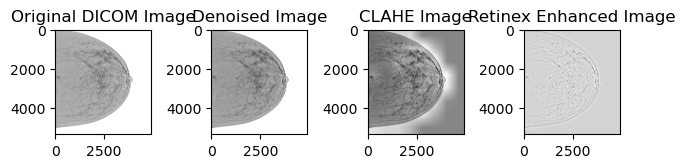

In [32]:
import cv2
import matplotlib.pyplot as plt
import pydicom
import numpy as np

def denoise_gaussian(image, sigma=1.5):
    # Apply Gaussian denoising
    denoised_image = cv2.GaussianBlur(image, (0, 0), sigma)
    return denoised_image

def apply_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    # Create CLAHE object
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    
    # Apply CLAHE
    clahe_image = clahe.apply(image)
    return clahe_image

def retinex(image, sigma=50):
    # Apply a Gaussian filter to the image
    blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)
    
    # Calculate the logarithm of the image and the blurred image
    log_image = np.log1p(image.astype(np.float32))
    log_blurred = np.log1p(blurred_image.astype(np.float32))
    
    # Calculate the Retinex response
    retinex_response = log_image - log_blurred
    
    # Rescale the Retinex response to 0-255
    retinex_response = (retinex_response - np.min(retinex_response)) / (np.max(retinex_response) - np.min(retinex_response)) * 255.0
    
    return retinex_response.astype(np.uint8)

# Load DICOM file from your new dataset
file_path = './now.dcm'
dicom_image = pydicom.dcmread(file_path)

# Display original DICOM image
plt.subplot(1, 4, 1)
plt.imshow(dicom_image.pixel_array, cmap='gray')
plt.title('Original DICOM Image')

# Apply Gaussian denoising
denoised_image = denoise_gaussian(dicom_image.pixel_array)

# Display Denoised Image
plt.subplot(1, 4, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')

# Apply CLAHE
clahe_image = apply_clahe(denoised_image)

# Display CLAHE Image
plt.subplot(1, 4, 3)
plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE Image')

# Apply Retinex algorithm for contrast enhancement on CLAHE image
retinex_image = retinex(clahe_image)

# Display Retinex Enhanced Image
plt.subplot(1, 4, 4)
plt.imshow(retinex_image, cmap='gray')
plt.title('Retinex Enhanced Image')

plt.tight_layout()
plt.show()


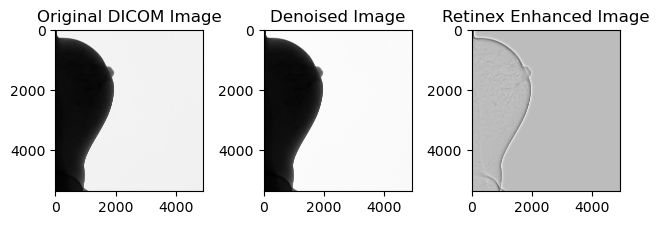

In [33]:
import cv2
import matplotlib.pyplot as plt
import pydicom
import numpy as np

def denoise_gaussian(image, sigma=1.5):
    # Apply Gaussian denoising
    denoised_image = cv2.GaussianBlur(image, (0, 0), sigma)
    return denoised_image

def retinex(image, sigma=50):
    # Apply a Gaussian filter to the image
    blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)
    
    # Calculate the logarithm of the image and the blurred image
    log_image = np.log1p(image.astype(np.float32))
    log_blurred = np.log1p(blurred_image.astype(np.float32))
    
    # Calculate the Retinex response
    retinex_response = log_image - log_blurred
    
    # Rescale the Retinex response to 0-255
    retinex_response = (retinex_response - np.min(retinex_response)) / (np.max(retinex_response) - np.min(retinex_response)) * 255.0
    
    return retinex_response.astype(np.uint8)

# Load DICOM file from your new dataset
file_path = './cool1.dcm'
dicom_image = pydicom.dcmread(file_path)

# Display original DICOM image
plt.subplot(1, 3, 1)
plt.imshow(dicom_image.pixel_array, cmap='gray')
plt.title('Original DICOM Image')

# Apply Gaussian denoising
denoised_image = denoise_gaussian(dicom_image.pixel_array)

# Display Denoised Image
plt.subplot(1, 3, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')

# Apply Retinex algorithm for contrast enhancement on denoised image
retinex_image = retinex(denoised_image)

# Display Retinex Enhanced Image
plt.subplot(1, 3, 3)
plt.imshow(retinex_image, cmap='gray')
plt.title('Retinex Enhanced Image')

plt.tight_layout()
plt.show()

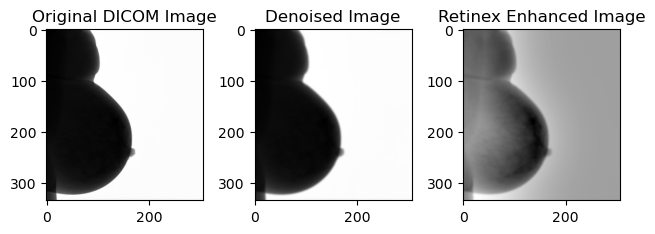

In [34]:
import cv2
import matplotlib.pyplot as plt
import pydicom
import numpy as np

def denoise_gaussian(image, sigma=1.5):
    # Apply Gaussian denoising
    denoised_image = cv2.GaussianBlur(image, (0, 0), sigma)
    return denoised_image

def retinex(image, sigma=50):
    # Apply a Gaussian filter to the image
    blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)
    
    # Calculate the logarithm of the image and the blurred image
    log_image = np.log1p(image.astype(np.float32))
    log_blurred = np.log1p(blurred_image.astype(np.float32))
    
    # Calculate the Retinex response
    retinex_response = log_image - log_blurred
    
    # Rescale the Retinex response to 0-255
    retinex_response = (retinex_response - np.min(retinex_response)) / (np.max(retinex_response) - np.min(retinex_response)) * 255.0
    
    return retinex_response.astype(np.uint8)

# Load DICOM file from your new dataset
file_path = './new.dcm'
dicom_image = pydicom.dcmread(file_path)

# Display original DICOM image
plt.subplot(1, 3, 1)
plt.imshow(dicom_image.pixel_array, cmap='gray')
plt.title('Original DICOM Image')

# Apply Gaussian denoising
denoised_image = denoise_gaussian(dicom_image.pixel_array)

# Display Denoised Image
plt.subplot(1, 3, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')

# Apply Retinex algorithm for contrast enhancement on denoised image
retinex_image = retinex(denoised_image)

# Display Retinex Enhanced Image
plt.subplot(1, 3, 3)
plt.imshow(retinex_image, cmap='gray')
plt.title('Retinex Enhanced Image')

plt.tight_layout()
plt.show()

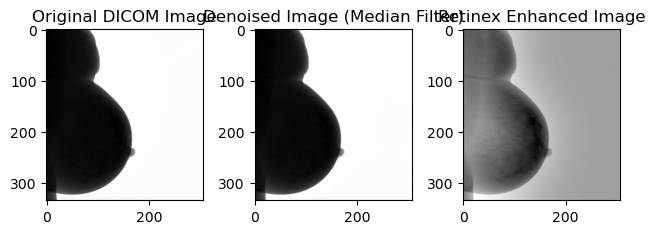

In [35]:
import cv2
import matplotlib.pyplot as plt
import pydicom
import numpy as np

def denoise_median(image, ksize=3):
    # Apply Median filter for denoising
    denoised_image = cv2.medianBlur(image, ksize)
    return denoised_image

def retinex(image, sigma=50):
    # Apply a Gaussian filter to the image
    blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)
    
    # Calculate the logarithm of the image and the blurred image
    log_image = np.log1p(image.astype(np.float32))
    log_blurred = np.log1p(blurred_image.astype(np.float32))
    
    # Calculate the Retinex response
    retinex_response = log_image - log_blurred
    
    # Rescale the Retinex response to 0-255
    retinex_response = (retinex_response - np.min(retinex_response)) / (np.max(retinex_response) - np.min(retinex_response)) * 255.0
    
    return retinex_response.astype(np.uint8)

# Load DICOM file from your new dataset
file_path = './new.dcm'
dicom_image = pydicom.dcmread(file_path)

# Display original DICOM image
plt.subplot(1, 3, 1)
plt.imshow(dicom_image.pixel_array, cmap='gray')
plt.title('Original DICOM Image')

# Apply Median filter for denoising
denoised_image = denoise_median(dicom_image.pixel_array)

# Display Denoised Image
plt.subplot(1, 3, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image (Median Filter)')

# Apply Retinex algorithm for contrast enhancement on denoised image
retinex_image = retinex(denoised_image)

# Display Retinex Enhanced Image
plt.subplot(1, 3, 3)
plt.imshow(retinex_image, cmap='gray')
plt.title('Retinex Enhanced Image')

plt.tight_layout()
plt.show()


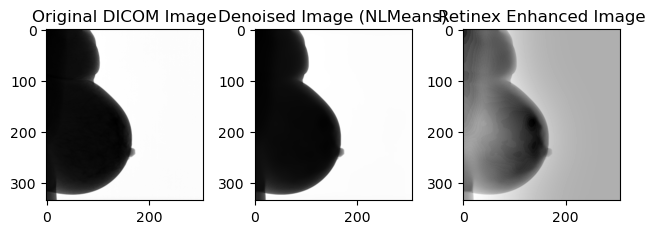

In [36]:
import cv2
import matplotlib.pyplot as plt
import pydicom
import numpy as np

def denoise_nlmeans(image, h=10, templateWindowSize=7, searchWindowSize=21):
    # Convert image to 8-bit unsigned integer format
    image_uint8 = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    
    # Apply Non-Local Means denoising
    denoised_image = cv2.fastNlMeansDenoising(image_uint8, None, h, templateWindowSize, searchWindowSize)
    
    return denoised_image

def retinex(image, sigma=50):
    # Apply a Gaussian filter to the image
    blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)
    
    # Calculate the logarithm of the image and the blurred image
    log_image = np.log1p(image.astype(np.float32))
    log_blurred = np.log1p(blurred_image.astype(np.float32))
    
    # Calculate the Retinex response
    retinex_response = log_image - log_blurred
    
    # Rescale the Retinex response to 0-255
    retinex_response = (retinex_response - np.min(retinex_response)) / (np.max(retinex_response) - np.min(retinex_response)) * 255.0
    
    return retinex_response.astype(np.uint8)

# Load DICOM file from your new dataset
file_path = './new.dcm'
dicom_image = pydicom.dcmread(file_path)

# Display original DICOM image
plt.subplot(1, 3, 1)
plt.imshow(dicom_image.pixel_array, cmap='gray')
plt.title('Original DICOM Image')

# Apply Non-Local Means denoising
denoised_image = denoise_nlmeans(dicom_image.pixel_array)

# Display Denoised Image
plt.subplot(1, 3, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image (NLMeans)')

# Apply Retinex algorithm for contrast enhancement on denoised image
retinex_image = retinex(denoised_image)

# Display Retinex Enhanced Image
plt.subplot(1, 3, 3)
plt.imshow(retinex_image, cmap='gray')
plt.title('Retinex Enhanced Image')

plt.tight_layout()
plt.show()

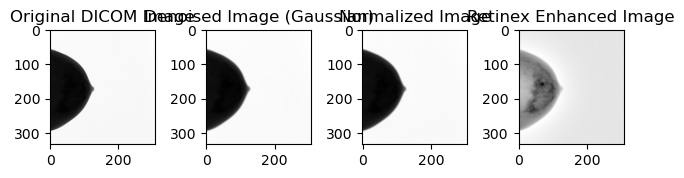

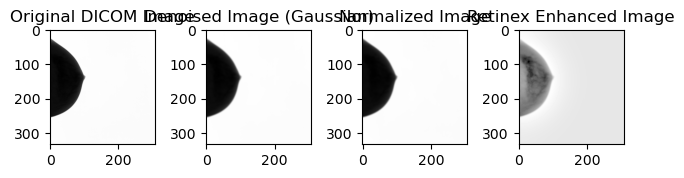

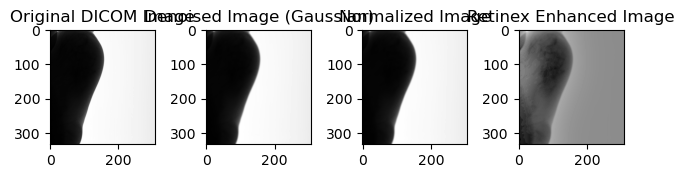

In [37]:
import cv2
import matplotlib.pyplot as plt
import pydicom
import numpy as np

def denoise_gaussian(image, sigma=1.5):
    # Apply Gaussian denoising
    denoised_image = cv2.GaussianBlur(image, (0, 0), sigma)
    return denoised_image

def normalize_image(image):
    # Normalize pixel values to 0-255 range for 8-bit unsigned integer images
    normalized_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    return normalized_image

def retinex(image, sigma=50):
    # Apply a Gaussian filter to the image
    blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)
    
    # Calculate the logarithm of the image and the blurred image
    log_image = np.log1p(image.astype(np.float32))
    log_blurred = np.log1p(blurred_image.astype(np.float32))
    
    # Calculate the Retinex response
    retinex_response = log_image - log_blurred
    
    # Rescale the Retinex response to 0-255
    retinex_response = (retinex_response - np.min(retinex_response)) / (np.max(retinex_response) - np.min(retinex_response)) * 255.0
    
    return retinex_response.astype(np.uint8)

# File paths for your DICOM images
file_paths = ['./1-5.dcm',
              './1-9.dcm',
              './new1.dcm']

# Load each DICOM image, handle three-dimensional array, denoise with Gaussian blur, normalize, and apply Retinex enhancement
for file_path in file_paths:
    dicom_image = pydicom.dcmread(file_path)

    # Check if the image has three dimensions and select the first slice
    if len(dicom_image.pixel_array.shape) == 3:
        dicom_image.pixel_array = dicom_image.pixel_array[:, :, 0]

    # Display original DICOM image
    plt.subplot(1, 4, 1)
    plt.imshow(dicom_image.pixel_array, cmap='gray')
    plt.title('Original DICOM Image')

    # Apply Gaussian denoising
    denoised_image = denoise_gaussian(dicom_image.pixel_array)

    # Display Denoised Image
    plt.subplot(1, 4, 2)
    plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image (Gaussian)')

    # Normalize pixel values
    normalized_image = normalize_image(denoised_image)

    # Display Normalized Image
    plt.subplot(1, 4, 3)
    plt.imshow(normalized_image, cmap='gray')
    plt.title('Normalized Image')

    # Apply Retinex algorithm for contrast enhancement on normalized image
    retinex_image = retinex(normalized_image)

    # Display Retinex Enhanced Image
    plt.subplot(1, 4, 4)
    plt.imshow(retinex_image, cmap='gray')
    plt.title('Retinex Enhanced Image')

    plt.tight_layout()
    plt.show()

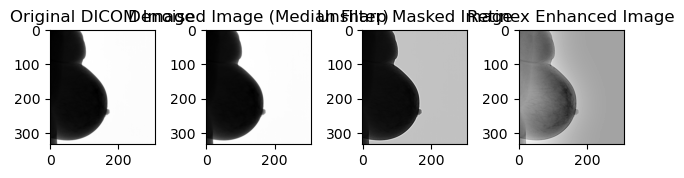

In [38]:
import cv2
import matplotlib.pyplot as plt
import pydicom
import numpy as np

def unsharp_mask(image, sigma=1.5, strength=1.5):
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)
    sharpened = cv2.addWeighted(image, 1.0 + strength, blurred, -strength, 0)
    return sharpened

def denoise_median(image, ksize=3):
    # Apply Median filter for denoising
    denoised_image = cv2.medianBlur(image, ksize)
    return denoised_image

def retinex(image, sigma=50):
    # Apply a Gaussian filter to the image
    blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)
    
    # Calculate the logarithm of the image and the blurred image
    log_image = np.log1p(image.astype(np.float32))
    log_blurred = np.log1p(blurred_image.astype(np.float32))
    
    # Calculate the Retinex response
    retinex_response = log_image - log_blurred
    
    # Rescale the Retinex response to 0-255
    retinex_response = (retinex_response - np.min(retinex_response)) / (np.max(retinex_response) - np.min(retinex_response)) * 255.0
    
    return retinex_response.astype(np.uint8)

# Load DICOM file from your new dataset
file_path = './new.dcm'
dicom_image = pydicom.dcmread(file_path)

# Display original DICOM image
plt.subplot(1, 4, 1)
plt.imshow(dicom_image.pixel_array, cmap='gray')
plt.title('Original DICOM Image')

# Apply Median filter for denoising
denoised_image = denoise_median(dicom_image.pixel_array)

# Display Denoised Image
plt.subplot(1, 4, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image (Median Filter)')

# Apply Unsharp Masking for enhancing edges
sharpened_image = unsharp_mask(denoised_image)

# Display Unsharp Masked Image
plt.subplot(1, 4, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Unsharp Masked Image')

# Apply Retinex algorithm for contrast enhancement on unsharp masked image
retinex_image = retinex(sharpened_image)

# Display Retinex Enhanced Image
plt.subplot(1, 4, 4)
plt.imshow(retinex_image, cmap='gray')
plt.title('Retinex Enhanced Image')

plt.tight_layout()
plt.show()


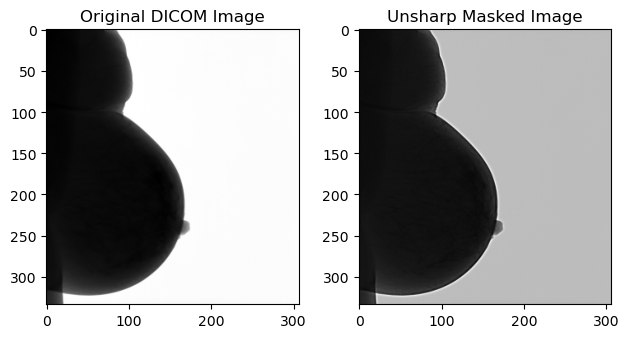

In [40]:
import cv2
import matplotlib.pyplot as plt
import pydicom
import numpy as np

def unsharp_mask(image, sigma=1.5, strength=1.5):
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)
    sharpened = cv2.addWeighted(image, 1.0 + strength, blurred, -strength, 0)
    return sharpened

# Load DICOM file from your new dataset
file_path = './new.dcm'
dicom_image = pydicom.dcmread(file_path)

# Display original DICOM image
plt.subplot(1, 2, 1)
plt.imshow(dicom_image.pixel_array, cmap='gray')
plt.title('Original DICOM Image')

# Apply Unsharp Masking
unsharp_masked_image = unsharp_mask(dicom_image.pixel_array)

# Display Unsharp Masked Image
plt.subplot(1, 2, 2)
plt.imshow(unsharp_masked_image, cmap='gray')
plt.title('Unsharp Masked Image')

plt.tight_layout()
plt.show()


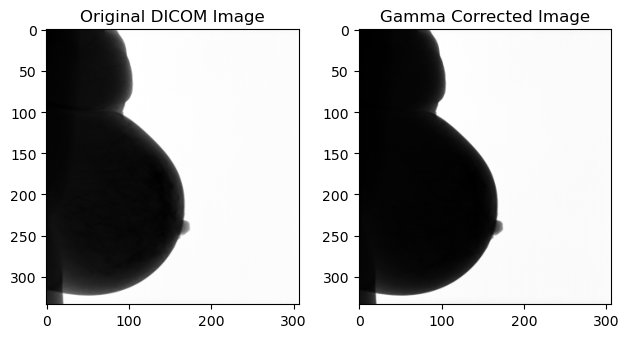

In [41]:
import cv2
import matplotlib.pyplot as plt
import pydicom
import numpy as np

def gamma_correction(image, gamma=1.5):
    """
    Apply gamma correction to adjust brightness and contrast.

    Parameters:
    - image: Input image.
    - gamma: Gamma correction parameter.

    Returns:
    - Gamma-corrected image.
    """
    corrected_image = np.power(image, gamma)
    return corrected_image

# Load DICOM file from your new dataset
file_path = './new.dcm'
dicom_image = pydicom.dcmread(file_path)

# Display original DICOM image
plt.subplot(1, 2, 1)
plt.imshow(dicom_image.pixel_array, cmap='gray')
plt.title('Original DICOM Image')

# Apply Gamma Correction
gamma_corrected_image = gamma_correction(dicom_image.pixel_array, gamma=1.5)

# Display Gamma Corrected Image
plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected_image, cmap='gray')
plt.title('Gamma Corrected Image')

plt.tight_layout()
plt.show()


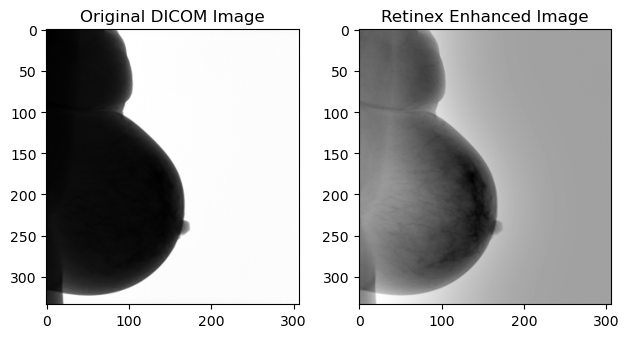

In [42]:
import cv2
import matplotlib.pyplot as plt
import pydicom
import numpy as np

def retinex(image, sigma=50):
    # Apply a Gaussian filter to the image
    blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)
    
    # Calculate the logarithm of the image and the blurred image
    log_image = np.log1p(image.astype(np.float32))
    log_blurred = np.log1p(blurred_image.astype(np.float32))
    
    # Calculate the Retinex response
    retinex_response = log_image - log_blurred
    
    # Rescale the Retinex response to 0-255
    retinex_response = (retinex_response - np.min(retinex_response)) / (np.max(retinex_response) - np.min(retinex_response)) * 255.0
    
    return retinex_response.astype(np.uint8)

# Load DICOM file from your new dataset
file_path = './new.dcm'
dicom_image = pydicom.dcmread(file_path)

# Display original DICOM image
plt.subplot(1, 2, 1)
plt.imshow(dicom_image.pixel_array, cmap='gray')
plt.title('Original DICOM Image')

# Apply Retinex algorithm for contrast enhancement
retinex_image = retinex(dicom_image.pixel_array)

# Display Retinex Enhanced Image
plt.subplot(1, 2, 2)
plt.imshow(retinex_image, cmap='gray')
plt.title('Retinex Enhanced Image')

plt.tight_layout()
plt.show()


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\histogram.cpp:3440: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'cv::equalizeHist'


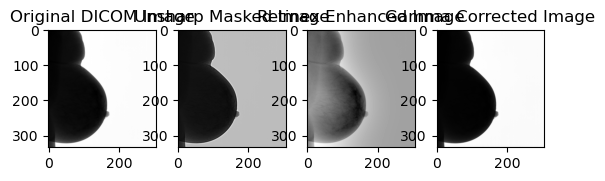

In [43]:
import cv2
import matplotlib.pyplot as plt
import pydicom
import numpy as np

def unsharp_mask(image, sigma=1.5, strength=1.5):
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)
    sharpened = cv2.addWeighted(image, 1.0 + strength, blurred, -strength, 0)
    return sharpened

def retinex(image, sigma=50):
    blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)
    log_image = np.log1p(image.astype(np.float32))
    log_blurred = np.log1p(blurred_image.astype(np.float32))
    retinex_response = log_image - log_blurred
    retinex_response = (retinex_response - np.min(retinex_response)) / (np.max(retinex_response) - np.min(retinex_response)) * 255.0
    return retinex_response.astype(np.uint8)

def gamma_correction(image, gamma=1.5):
    corrected_image = np.power(image, gamma)
    return corrected_image

def apply_histogram_equalization(image):
    equalized_image = cv2.equalizeHist(image)
    return equalized_image

def apply_adaptive_histogram_equalization(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    ahe_image = clahe.apply(image)
    return ahe_image

def apply_non_local_means_denoising(image, h=10, templateWindowSize=7, searchWindowSize=21):
    denoised_image = cv2.fastNlMeansDenoising(image, None, h, templateWindowSize, searchWindowSize)
    return denoised_image

def apply_median_filtering(image, ksize=3):
    median_filtered_image = cv2.medianBlur(image, ksize)
    return median_filtered_image

# Load DICOM file from your new dataset
file_path = './new.dcm'
dicom_image = pydicom.dcmread(file_path)

# Convert to grayscale
grayscale_image = dicom_image.pixel_array

# Display original DICOM image
plt.subplot(2, 4, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original DICOM Image')

# Apply Unsharp Masking
sharpened_image = unsharp_mask(grayscale_image)
plt.subplot(2, 4, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Unsharp Masked Image')

# Apply Retinex algorithm
retinex_image = retinex(grayscale_image)
plt.subplot(2, 4, 3)
plt.imshow(retinex_image, cmap='gray')
plt.title('Retinex Enhanced Image')

# Apply Gamma Correction
gamma_corrected_image = gamma_correction(grayscale_image)
plt.subplot(2, 4, 4)
plt.imshow(gamma_corrected_image, cmap='gray')
plt.title('Gamma Corrected Image')

# Apply Histogram Equalization
equalized_image = apply_histogram_equalization(grayscale_image)
plt.subplot(2, 4, 5)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')

# Apply Adaptive Histogram Equalization
ahe_image = apply_adaptive_histogram_equalization(grayscale_image)
plt.subplot(2, 4, 6)
plt.imshow(ahe_image, cmap='gray')
plt.title('Adaptive Histogram Equalized Image')

# Apply Non-Local Means Denoising
denoised_image = apply_non_local_means_denoising(grayscale_image)
plt.subplot(2, 4, 7)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')

# Apply Median Filtering
median_filtered_image = apply_median_filtering(grayscale_image)
plt.subplot(2, 4, 8)
plt.imshow(median_filtered_image, cmap='gray')
plt.title('Median Filtered Image')

plt.tight_layout()
plt.show()


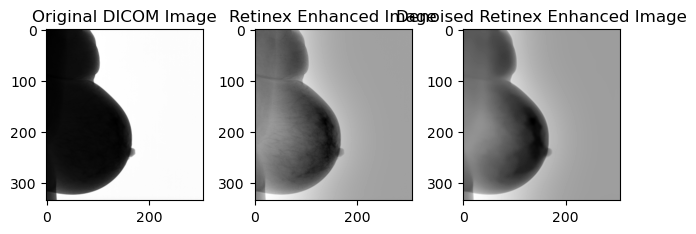

In [44]:
import cv2
import matplotlib.pyplot as plt
import pydicom
import numpy as np

def retinex(image, sigma=50):
    blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)
    log_image = np.log1p(image.astype(np.float32))
    log_blurred = np.log1p(blurred_image.astype(np.float32))
    retinex_response = log_image - log_blurred
    retinex_response = (retinex_response - np.min(retinex_response)) / (np.max(retinex_response) - np.min(retinex_response)) * 255.0
    return retinex_response.astype(np.uint8)

def normalize_image(image):
    normalized_image = image.astype(float)
    normalized_image /= np.max(normalized_image)
    return normalized_image

def denoise_nlmeans(image, h=10, templateWindowSize=7, searchWindowSize=21):
    denoised_image = cv2.fastNlMeansDenoising(image, None, h, templateWindowSize, searchWindowSize)
    return denoised_image

# Load DICOM file from your new dataset
file_path = './new.dcm'
dicom_image = pydicom.dcmread(file_path)

# Convert to grayscale
grayscale_image = dicom_image.pixel_array

# Apply Retinex algorithm
retinex_image = retinex(grayscale_image)

# Denoise the Retinex-enhanced image
denoised_retinex_image = denoise_nlmeans(retinex_image)

# Display the original, Retinex-enhanced, and denoised Retinex-enhanced images
plt.subplot(1, 3, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original DICOM Image')

plt.subplot(1, 3, 2)
plt.imshow(retinex_image, cmap='gray')
plt.title('Retinex Enhanced Image')

plt.subplot(1, 3, 3)
plt.imshow(denoised_retinex_image, cmap='gray')
plt.title('Denoised Retinex Enhanced Image')

plt.tight_layout()
plt.show()


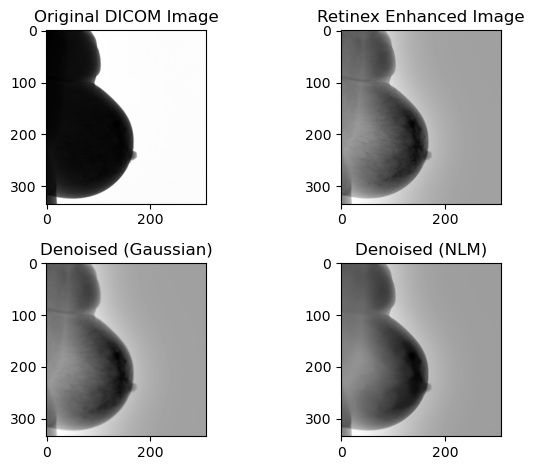

In [45]:
import cv2
import matplotlib.pyplot as plt
import pydicom
import numpy as np

def retinex(image, sigma=50):
    blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)
    log_image = np.log1p(image.astype(np.float32))
    log_blurred = np.log1p(blurred_image.astype(np.float32))
    retinex_response = log_image - log_blurred
    retinex_response = (retinex_response - np.min(retinex_response)) / (np.max(retinex_response) - np.min(retinex_response)) * 255.0
    return retinex_response.astype(np.uint8)

def normalize_image(image):
    normalized_image = image.astype(float)
    normalized_image /= np.max(normalized_image)
    return normalized_image

def denoise_gaussian(image, sigma=1):
    denoised_image = cv2.GaussianBlur(image, (0, 0), sigma)
    return denoised_image

def denoise_nlmeans(image, h=10, templateWindowSize=7, searchWindowSize=21):
    denoised_image = cv2.fastNlMeansDenoising(image, None, h, templateWindowSize, searchWindowSize)
    return denoised_image

def denoise_median(image, ksize=3):
    denoised_image = cv2.medianBlur(image, ksize)
    return denoised_image

# Load DICOM file from your new dataset
file_path = './new.dcm'
dicom_image = pydicom.dcmread(file_path)

# Convert to grayscale
grayscale_image = dicom_image.pixel_array

# Apply Retinex algorithm
retinex_image = retinex(grayscale_image)

# Denoise the Retinex-enhanced image using different techniques
denoised_gaussian = denoise_gaussian(retinex_image, sigma=1)
denoised_nlmeans = denoise_nlmeans(retinex_image)
denoised_median = denoise_median(retinex_image, ksize=3)

# Display the original, Retinex-enhanced, and denoised images using different techniques
plt.subplot(2, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original DICOM Image')

plt.subplot(2, 2, 2)
plt.imshow(retinex_image, cmap='gray')
plt.title('Retinex Enhanced Image')

plt.subplot(2, 2, 3)
plt.imshow(denoised_gaussian, cmap='gray')
plt.title('Denoised (Gaussian)')

plt.subplot(2, 2, 4)
plt.imshow(denoised_nlmeans, cmap='gray')
plt.title('Denoised (NLM)')

plt.tight_layout()
plt.show()


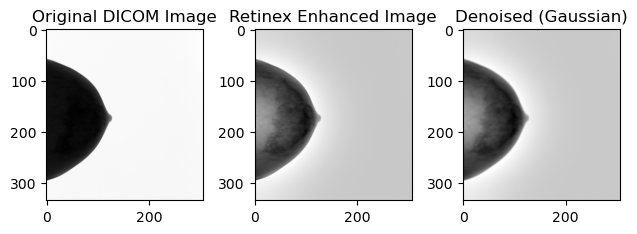

In [58]:
import cv2
import matplotlib.pyplot as plt
import pydicom
import numpy as np

def retinex(image, sigma=50):
    blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)
    log_image = np.log1p(image.astype(np.float32))
    log_blurred = np.log1p(blurred_image.astype(np.float32))
    retinex_response = log_image - log_blurred
    retinex_response = (retinex_response - np.min(retinex_response)) / (np.max(retinex_response) - np.min(retinex_response)) * 255.0
    return retinex_response.astype(np.uint8)

def normalize_image(image):
    normalized_image = image.astype(float)
    normalized_image /= np.max(normalized_image)
    return normalized_image

def denoise_gaussian(image, sigma=1):
    denoised_image = cv2.GaussianBlur(image, (0, 0), sigma)
    return denoised_image

# Load DICOM file from your new dataset
file_path = './1-5.dcm'
dicom_image = pydicom.dcmread(file_path)

# Convert to grayscale
grayscale_image = dicom_image.pixel_array

# Apply Retinex algorithm
retinex_image = retinex(grayscale_image)

# Denoise the Retinex-enhanced image using Gaussian filtering
denoised_gaussian = denoise_gaussian(retinex_image, sigma=1)

# Display the original, Retinex-enhanced, and denoised image using Gaussian filtering
plt.subplot(1, 3, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original DICOM Image')

plt.subplot(1, 3, 2)
plt.imshow(retinex_image, cmap='gray')
plt.title('Retinex Enhanced Image')

plt.subplot(1, 3, 3)
plt.imshow(denoised_gaussian, cmap='gray')
plt.title('Denoised (Gaussian)')

plt.tight_layout()
plt.show()


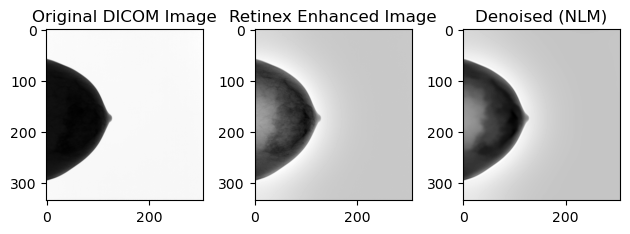

In [59]:
def denoise_nlmeans(image, h=10, templateWindowSize=7, searchWindowSize=21):
    denoised_image = cv2.fastNlMeansDenoising(image, None, h, templateWindowSize, searchWindowSize)
    return denoised_image

# Denoise the Retinex-enhanced image using Non-Local Means Denoising
denoised_nlmeans = denoise_nlmeans(retinex_image)

# Display the original, Retinex-enhanced, and denoised image using Non-Local Means Denoising
plt.subplot(1, 3, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original DICOM Image')

plt.subplot(1, 3, 2)
plt.imshow(retinex_image, cmap='gray')
plt.title('Retinex Enhanced Image')

plt.subplot(1, 3, 3)
plt.imshow(denoised_nlmeans, cmap='gray')
plt.title('Denoised (NLM)')

plt.tight_layout()
plt.show()


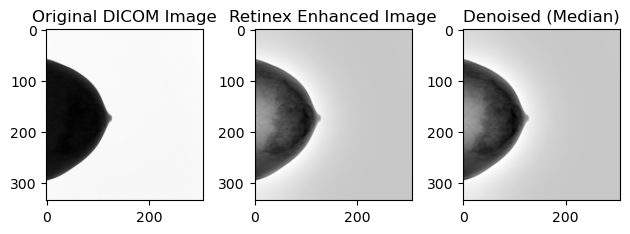

In [60]:
def denoise_median(image, ksize=3):
    denoised_image = cv2.medianBlur(image, ksize)
    return denoised_image

# Denoise the Retinex-enhanced image using Median Filtering
denoised_median = denoise_median(retinex_image, ksize=3)

# Display the original, Retinex-enhanced, and denoised image using Median Filtering
plt.subplot(1, 3, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original DICOM Image')

plt.subplot(1, 3, 2)
plt.imshow(retinex_image, cmap='gray')
plt.title('Retinex Enhanced Image')

plt.subplot(1, 3, 3)
plt.imshow(denoised_median, cmap='gray')
plt.title('Denoised (Median)')

plt.tight_layout()
plt.show()


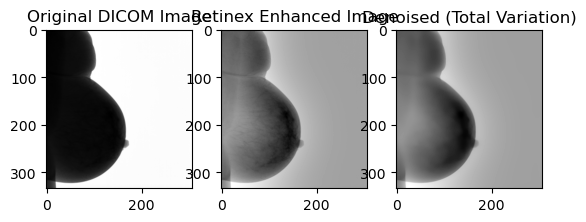

In [55]:
import cv2
import matplotlib.pyplot as plt
import pydicom
import numpy as np
import pywt  # Import PyWavelets
from skimage import restoration  # Import the restoration module for Tota

# 3.2 Total Variation Denoising
def denoise_tv(image, weight=0.1):
    denoised_image = restoration.denoise_tv_chambolle(image, weight=weight)
    return denoised_image

# Denoise the Retinex-enhanced image using Total Variation Denoising
denoised_tv = denoise_tv(retinex_image)

# Display the original, Retinex-enhanced, and denoised image using Total Variation Denoising
plt.subplot(1, 3, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original DICOM Image')

plt.subplot(1, 3, 2)
plt.imshow(retinex_image, cmap='gray')
plt.title('Retinex Enhanced Image')

plt.subplot(1, 3, 3)
plt.imshow(denoised_tv, cmap='gray')
plt.title('Denoised (Total Variation)')
plt.show()

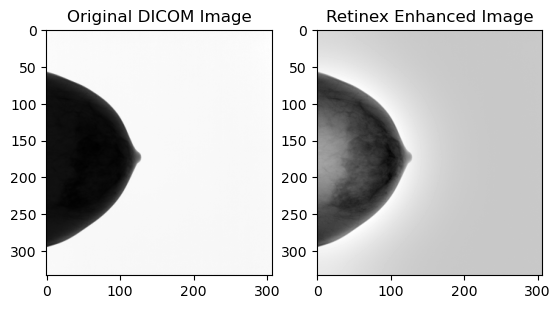

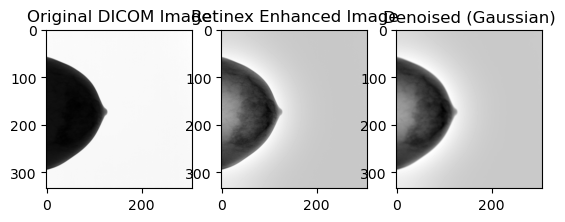

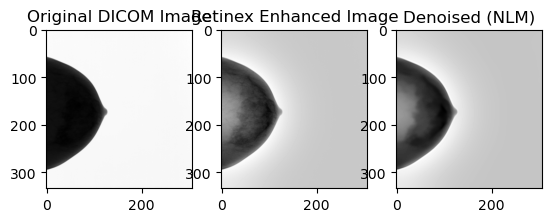

In [62]:
import cv2
import matplotlib.pyplot as plt
import pydicom
import numpy as np
import pywt  # Import PyWavelets
from skimage import restoration  # Import the restoration module for Total Variation Denoising

# Load DICOM file from your new dataset
file_path = './1-5.dcm'
dicom_image = pydicom.dcmread(file_path)

# Convert to grayscale
grayscale_image = dicom_image.pixel_array

# 1. Retinex Algorithm
def retinex(image, sigma=50):
    blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)
    log_image = np.log1p(image.astype(np.float32))
    log_blurred = np.log1p(blurred_image.astype(np.float32))
    retinex_response = log_image - log_blurred
    retinex_response = (retinex_response - np.min(retinex_response)) / (np.max(retinex_response) - np.min(retinex_response)) * 255.0
    return retinex_response.astype(np.uint8)

# Apply Retinex algorithm
retinex_image = retinex(grayscale_image)

# Display the original and Retinex-enhanced images
plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original DICOM Image')

plt.subplot(1, 2, 2)
plt.imshow(retinex_image, cmap='gray')
plt.title('Retinex Enhanced Image')
plt.show()

# 2. Denoising Techniques

# 2.1 Gaussian Denoising
def denoise_gaussian(image, sigma=1):
    denoised_image = cv2.GaussianBlur(image, (0, 0), sigma)
    return denoised_image

# Denoise the Retinex-enhanced image using Gaussian Denoising
denoised_gaussian = denoise_gaussian(retinex_image, sigma=1)

# Display the original, Retinex-enhanced, and denoised image using Gaussian Denoising
plt.subplot(1, 3, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original DICOM Image')

plt.subplot(1, 3, 2)
plt.imshow(retinex_image, cmap='gray')
plt.title('Retinex Enhanced Image')

plt.subplot(1, 3, 3)
plt.imshow(denoised_gaussian, cmap='gray')
plt.title('Denoised (Gaussian)')
plt.show()

# 2.2 Non-Local Means Denoising
def denoise_nlmeans(image, h=10, templateWindowSize=7, searchWindowSize=21):
    denoised_image = cv2.fastNlMeansDenoising(image, None, h, templateWindowSize, searchWindowSize)
    return denoised_image

# Denoise the Retinex-enhanced image using Non-Local Means Denoising
denoised_nlmeans = denoise_nlmeans(retinex_image)

# Display the original, Retinex-enhanced, and denoised image using Non-Local Means Denoising
plt.subplot(1, 3, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original DICOM Image')

plt.subplot(1, 3, 2)
plt.imshow(retinex_image, cmap='gray')
plt.title('Retinex Enhanced Image')

plt.subplot(1, 3, 3)
plt.imshow(denoised_nlmeans, cmap='gray')
plt.title('Denoised (NLM)')
plt.show()

# ... Continue with other denoising and enhancement techniques as needed.


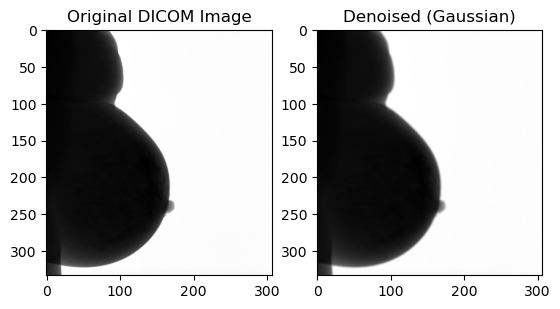

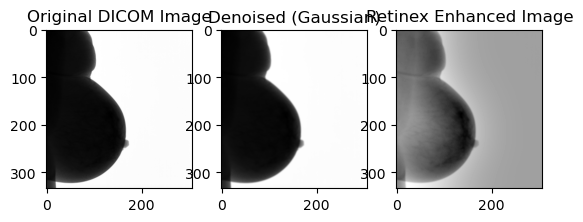

In [64]:
import cv2
import matplotlib.pyplot as plt
import pydicom
import numpy as np

# Load DICOM file from your new dataset
file_path = './new.dcm'
dicom_image = pydicom.dcmread(file_path)

# Convert to grayscale
grayscale_image = dicom_image.pixel_array

# Denoise the original image using Gaussian Denoising
denoised_gaussian = cv2.GaussianBlur(grayscale_image, (0, 0), 1)

# Display the original and denoised image using Gaussian Denoising
plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original DICOM Image')

plt.subplot(1, 2, 2)
plt.imshow(denoised_gaussian, cmap='gray')
plt.title('Denoised (Gaussian)')
plt.show()

# Apply Retinex algorithm to the denoised image
blurred_image = cv2.GaussianBlur(grayscale_image, (0, 0), 50)
log_image = np.log1p(denoised_gaussian.astype(np.float32))
log_blurred = np.log1p(blurred_image.astype(np.float32))
retinex_response = log_image - log_blurred
retinex_response = (retinex_response - np.min(retinex_response)) / (np.max(retinex_response) - np.min(retinex_response)) * 255.0
retinex_image = retinex_response.astype(np.uint8)

# Display the original, denoised, and Retinex-enhanced image
plt.subplot(1, 3, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original DICOM Image')

plt.subplot(1, 3, 2)
plt.imshow(denoised_gaussian, cmap='gray')
plt.title('Denoised (Gaussian)')

plt.subplot(1, 3, 3)
plt.imshow(retinex_image, cmap='gray')
plt.title('Retinex Enhanced Image')
plt.show()


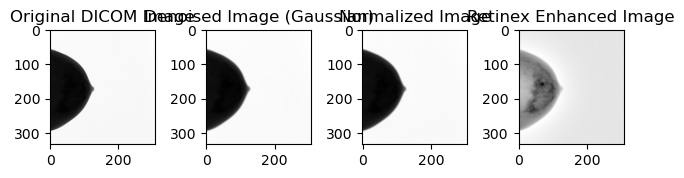

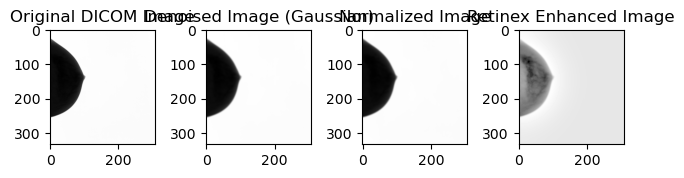

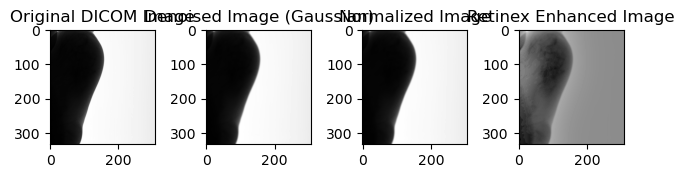

In [68]:
import cv2
import matplotlib.pyplot as plt
import pydicom
import numpy as np

def denoise_gaussian(image, sigma=1.5):
    # Apply Gaussian denoising
    denoised_image = cv2.GaussianBlur(image, (0, 0), sigma)
    return denoised_image

def normalize_image(image):
    # Normalize pixel values to 0-255 range for 8-bit unsigned integer images
    normalized_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    return normalized_image

def retinex(image, sigma=50):
    # Apply a Gaussian filter to the image
    blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)
    
    # Calculate the logarithm of the image and the blurred image
    log_image = np.log1p(image.astype(np.float32))
    log_blurred = np.log1p(blurred_image.astype(np.float32))
    
    # Calculate the Retinex response
    retinex_response = log_image - log_blurred
    
    # Rescale the Retinex response to 0-255
    retinex_response = (retinex_response - np.min(retinex_response)) / (np.max(retinex_response) - np.min(retinex_response)) * 255.0
    
    return retinex_response.astype(np.uint8)

# File paths for your DICOM images
file_paths = ['./1-5.dcm',
              './1-9.dcm',
              './new1.dcm']

# Load each DICOM image, handle three-dimensional array, denoise with Gaussian blur, normalize, and apply Retinex enhancement
for file_path in file_paths:
    dicom_image = pydicom.dcmread(file_path)

    # Check if the image has three dimensions and select the first slice
    if len(dicom_image.pixel_array.shape) == 3:
        dicom_image.pixel_array = dicom_image.pixel_array[:, :, 0]

    # Display original DICOM image
    plt.subplot(1, 4, 1)
    plt.imshow(dicom_image.pixel_array, cmap='gray')
    plt.title('Original DICOM Image')

    # Apply Gaussian denoising
    denoised_image = denoise_gaussian(dicom_image.pixel_array)

    # Display Denoised Image
    plt.subplot(1, 4, 2)
    plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image (Gaussian)')

    # Normalize pixel values
    normalized_image = normalize_image(denoised_image)

    # Display Normalized Image
    plt.subplot(1, 4, 3)
    plt.imshow(normalized_image, cmap='gray')
    plt.title('Normalized Image')

    # Apply Retinex algorithm for contrast enhancement on normalized image
    retinex_image = retinex(normalized_image)

    # Display Retinex Enhanced Image
    plt.subplot(1, 4, 4)
    plt.imshow(retinex_image, cmap='gray')
    plt.title('Retinex Enhanced Image')

    plt.tight_layout()
    plt.show()

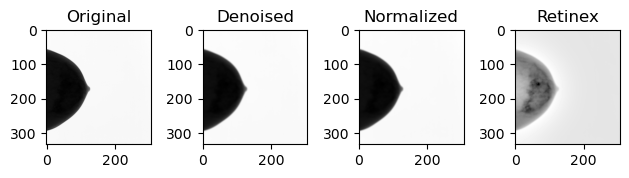

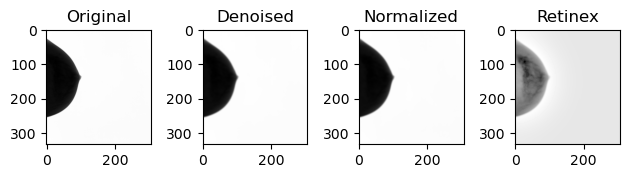

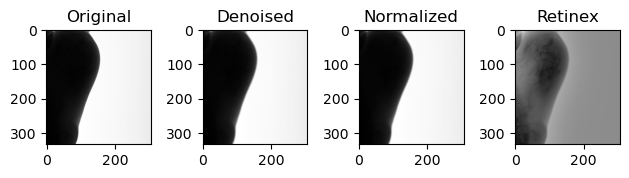

In [73]:
import cv2
import matplotlib.pyplot as plt
import pydicom
import numpy as np

def denoise_gaussian(image, sigma=1.5):
    # Apply Gaussian denoising
    denoised_image = cv2.GaussianBlur(image, (0, 0), sigma)
    return denoised_image

def normalize_image(image):
    # Normalize pixel values to 0-255 range for 8-bit unsigned integer images
    normalized_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    return normalized_image

def retinex(image, sigma=50):
    # Apply a Gaussian filter to the image
    blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)
    
    # Calculate the logarithm of the image and the blurred image
    log_image = np.log1p(image.astype(np.float32))
    log_blurred = np.log1p(blurred_image.astype(np.float32))
    
    # Calculate the Retinex response
    retinex_response = log_image - log_blurred
    
    # Rescale the Retinex response to 0-255
    retinex_response = (retinex_response - np.min(retinex_response)) / (np.max(retinex_response) - np.min(retinex_response)) * 255.0
    
    return retinex_response.astype(np.uint8)

# File paths for your DICOM images
file_paths = ['./1-5.dcm',
              './1-9.dcm',
              './new1.dcm']

# Load each DICOM image, handle three-dimensional array, denoise with Gaussian blur, normalize, and apply Retinex enhancement
for file_path in file_paths:
    dicom_image = pydicom.dcmread(file_path)

    # Check if the image has three dimensions and select the first slice
    if len(dicom_image.pixel_array.shape) == 3:
        dicom_image.pixel_array = dicom_image.pixel_array[:, :, 0]

    # Create a new figure for each DICOM image
    plt.figure()

    # Display original DICOM image
    plt.subplot(1, 4, 1)
    plt.imshow(dicom_image.pixel_array, cmap='gray')
    plt.title('Original', loc='center')  # Adjust title location

    # Apply Gaussian denoising
    denoised_image = denoise_gaussian(dicom_image.pixel_array)

    # Display Denoised Image
    plt.subplot(1, 4, 2)
    plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised', loc='center')  # Adjust title location

    # Normalize pixel values
    normalized_image = normalize_image(denoised_image)

    # Display Normalized Image
    plt.subplot(1, 4, 3)
    plt.imshow(normalized_image, cmap='gray')
    plt.title('Normalized', loc='center')  # Adjust title location

    # Apply Retinex algorithm for contrast enhancement on normalized image
    retinex_image = retinex(normalized_image)

    # Display Retinex Enhanced Image
    plt.subplot(1, 4, 4)
    plt.imshow(retinex_image, cmap='gray')
    plt.title('Retinex', loc='center')  # Adjust title location

    plt.tight_layout()
    plt.show()
